In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
plt.rcParams["font.family"] = "Times New Roman"

### LeakySineLU

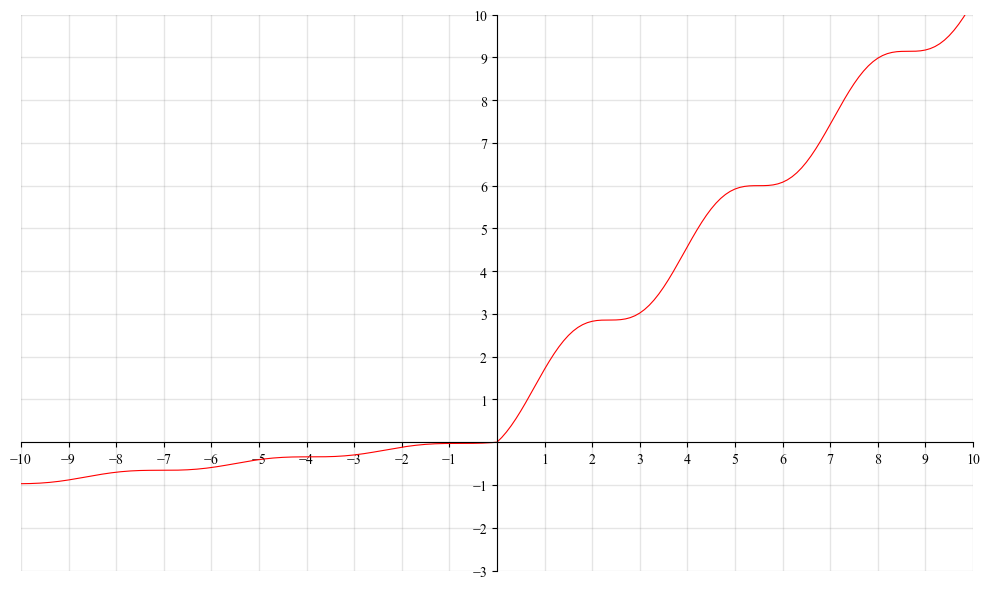

In [45]:
def leaky_sinelu(x: np.ndarray):
    return np.where(x >= 0, np.sin(x) ** 2 + x, 0.1 * (np.sin(x) ** 2 + x))

ys = leaky_sinelu(np.arange(-10, 10, 0.1))


fig, ax = plt.subplots(1, figsize=(10, 6))

ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

xmin, xmax, ymin, ymax = -10, 10, -3, 10
ticks_frequency = 1

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])

ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
ax.set_yticks(np.arange(ymin, ymax+1), minor=True)

ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

arrow_fmt = dict(markersize=4, color='black', clip_on=False)

ax.plot(np.arange(-10, 10, 0.1), ys, color='red', linewidth=0.8)

plt.tight_layout()

plt.savefig('../figures/leakysinelu.pdf')

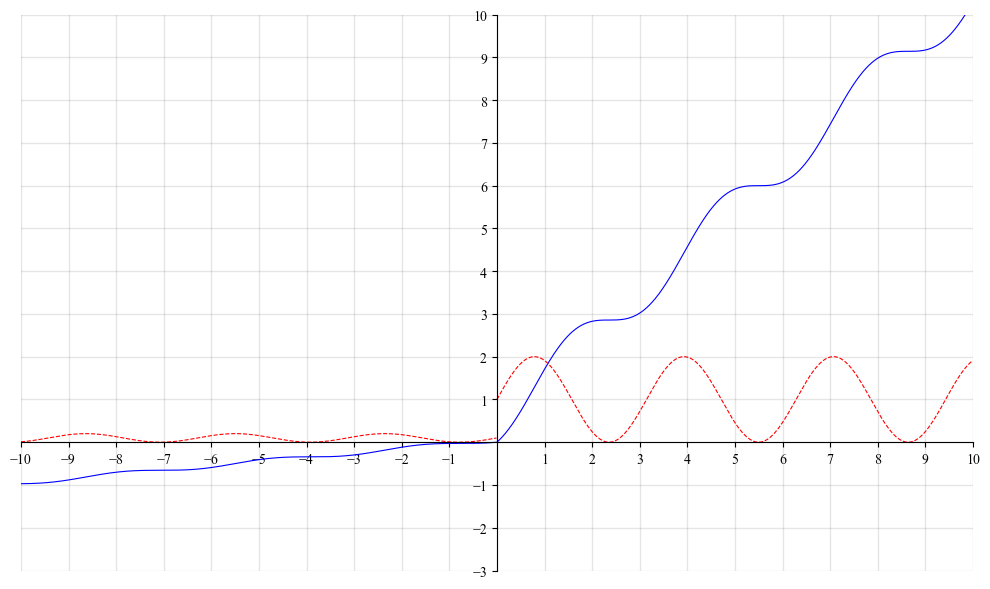

In [44]:
def d_leaky_sinelu(x: np.ndarray):
    return np.where(x >= 0, np.sin(2*x) + 1, 0.1 * (np.sin(2*x) + 1))

dys = leaky_sinelu(np.arange(-10, 10, 0.01))
positive_dys = d_leaky_sinelu(np.arange(0, 10, 0.01))
negative_dys = d_leaky_sinelu(np.arange(-10, 0, 0.01))

fig, ax = plt.subplots(1, figsize=(10, 6))

ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

xmin, xmax, ymin, ymax = -10, 10, -3, 10
ticks_frequency = 1

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])

ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
ax.set_yticks(np.arange(ymin, ymax+1), minor=True)

ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

arrow_fmt = dict(markersize=4, color='black', clip_on=False)

ax.plot(np.arange(-10, 10, 0.01), dys, color='blue', linewidth=0.8)
ax.plot(np.arange(0, 10, 0.01), positive_dys, color='red', linewidth=0.8, linestyle='dashed')
ax.plot(np.arange(-10, 0, 0.01), negative_dys, color='red', linewidth=0.8, linestyle='dashed')

plt.tight_layout()
plt.savefig('../figures/d_leakysinelu.pdf')

### Other Activations Comparinson

In [40]:
# Periodic activations

def sine(x: np.ndarray):
    return np.sin(x)

def d_sine(x: np.ndarray):
    return np.cos(x)

def cosine(x: np.ndarray):
    return np.cos(x)

def d_cosine(x: np.ndarray):
    return np.sin(x)

# Bounded activations

def tanh(x: np.ndarray):
    return np.tanh(x)

def d_tanh(x: np.ndarray):
    return 1 - tanh(x) ** 2

def sigmoid(x: np.ndarray):
    return 1 / (1 + np.exp(-x))

def d_sigmoid(x: np.ndarray):
    return sigmoid(x) * (1 - sigmoid(x))

# Linear Unit family activations

def relu(x: np.ndarray):
    return np.where(x >= 0, x, 0)

def d_relu(x: np.ndarray):
    return np.where(x >= 0, 1, 0)

def prelu(x: np.ndarray, alpha: float = 0.1):
    return np.where(x >= 0, x, alpha * x)

def d_prelu(x: np.ndarray, alpha: float = 0.1):
    return np.where(x >= 0, 1, alpha)

def elu(x: np.ndarray, alpha: float = 1.):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def d_elu(x: np.ndarray, alpha: float = 1.):
    return np.where(x > 0, 1, alpha * (np.exp(x) - 1) + alpha)

def mish(x: np.ndarray):
    def softplus(x: np.ndarray):
        return np.log1p(np.exp(-np.abs(x))) + np.maximum(x, 0)
    return x * np.tanh(softplus(x))

def d_mish(x: np.ndarray):
    omega = np.exp(3 * x) + 4 * np.exp(2 * x) + (6 + 4 * x) * np.exp(x) + 4 * (1 + x)
    delta = 1 + pow((np.exp(x) + 1), 2)
    derivative = np.exp(x) * omega / pow(delta, 2)
    return derivative

def selu(x: np.ndarray):
    scale = 1.0507009873554804934193349852946
    alpha = 1.6732632423543772848170429916717
    return scale * (np.where(x > 0, x, 0) + np.where(x <= 0, alpha * (np.exp(x) - 1), 0))

def d_selu(x: np.ndarray):
    scale = 1.0507009873554804934193349852946
    alpha = 1.6732632423543772848170429916717
    return np.where(x > 0, scale, scale * alpha * np.exp(x))

def silu(x: np.ndarray):
    return x * sigmoid(x)

def d_silu(x: np.ndarray):
    return (1 / (1 + np.exp(-x))) + ((np.exp(-x) * x) / (1 + np.exp(-x)) ** 2)

# Semi-periodic activations

def snake(x: np.ndarray):
    return np.sin(x) ** 2 + x

def d_snake(x: np.ndarray):
    return np.sin(2 * x) + 1


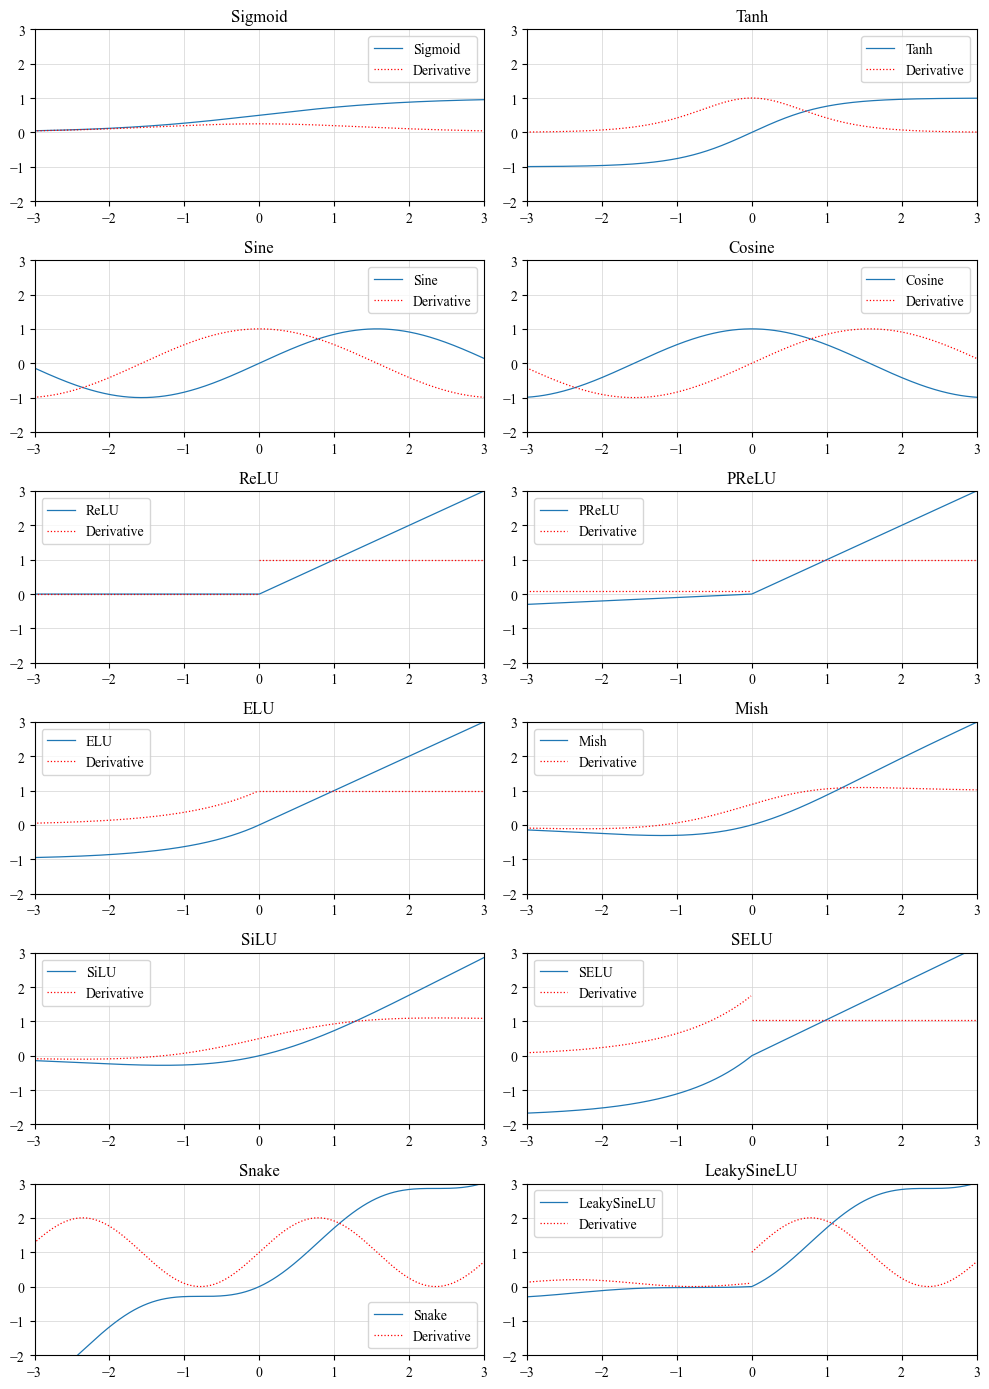

In [43]:
LINEWIDTH = 0.9
x = np.arange(-25, 25, 0.01)

activations = {
    'Sigmoid': sigmoid,
    'Tanh': tanh,
    'Sine': sine,
    'Cosine': cosine,
    'ReLU': relu,
    'PReLU': prelu,
    'ELU': elu,
    'Mish': mish,
    'SiLU': silu,
    'SELU': selu,
    'Snake': snake,
    'LeakySineLU': leaky_sinelu,
}

derivatives = {
    'Sigmoid': {
        'fn': d_sigmoid,
        'split': False,
    },
    'Tanh': {
        'fn': d_tanh,
        'split': False,
    },
    'Sine': {
        'fn': d_sine,
        'split': False,
    },
    'Cosine': {
        'fn': d_cosine,
        'split': False,
    },
    'ReLU': {
        'fn': d_relu,
        'split': True
    },
    'PReLU': {
        'fn': d_prelu,
        'split': True
    },
    'ELU': {
        'fn': d_elu,
        'split': True,
    },
    'Mish': {
        'fn': d_mish,
        'split': False,
    },
    'SiLU': {
        'fn': d_silu,
        'split': False,
    },
    'SELU': {
        'fn': d_selu,
        'split': True,
    },
    'Snake': {
        'fn': d_snake,
        'split': False
    },
    'LeakySineLU': {
        'fn': d_leaky_sinelu,
        'split': True
    }
}


fig = plt.figure(figsize=(10, 14))


for idx, activation in enumerate(activations.keys()):
    ax = fig.add_subplot(6, 2, idx + 1)

    sns.lineplot(x=x, y=activations[activation](x), ax=ax, label=activation, linewidth=LINEWIDTH).set_title(f'{activation}')
    
    if derivatives[activation]['split']:
        sns.lineplot(x=x[:len(x) // 2], y=derivatives[activation]['fn'](x[:len(x) // 2]),
                     ax=ax, color='red', linestyle='dotted', linewidth=LINEWIDTH, label='Derivative')
        sns.lineplot(x=x[len(x) // 2:], y=derivatives[activation]['fn'](x[len(x) // 2:]),
                     ax=ax, color='red', linestyle='dotted', linewidth=LINEWIDTH)
    else:
        sns.lineplot(x=x, y=derivatives[activation]['fn'](x),
                     ax=ax, color='red', linestyle='dotted', linewidth=LINEWIDTH, label='Derivative')

    ax.set_xlim((-3, 3))
    ax.set_ylim((-2, 3))
    
    ax.grid(linewidth=0.5, color='lightgray')

plt.tight_layout()

plt.savefig('../figures/activations_comparinson.pdf')

### Detailed Comparinson

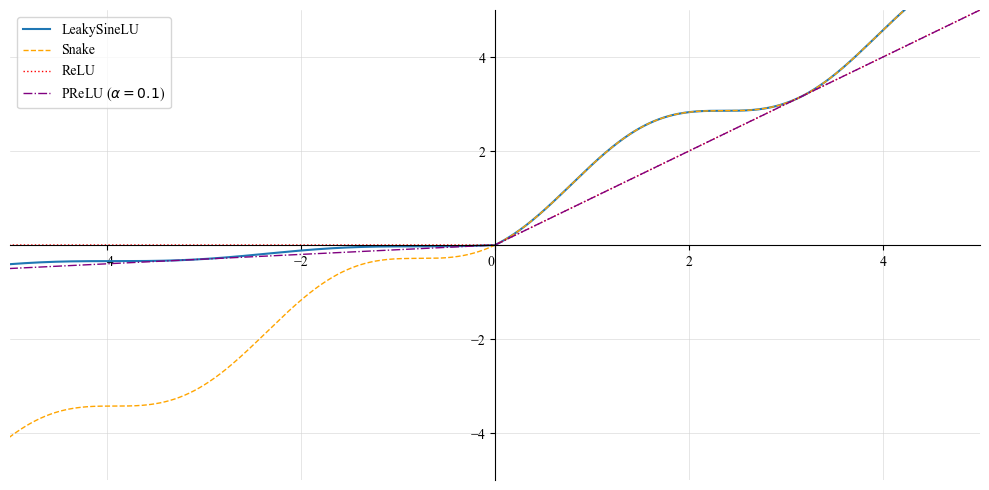

In [49]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

x_ = np.array(np.arange(-100, 100, 0.01))

ax.plot(x_, leaky_sinelu(x_), linewidth=1.5, label=r'LeakySineLU')
ax.plot(x_, snake(x_), linewidth=1., label=r'Snake', color='orange', linestyle='dashed')
ax.plot(x_, relu(x_), linewidth=1., label=r'ReLU', color='red', linestyle='dotted')
ax.plot(x_, prelu(x_), linewidth=1., label=r'PReLU ($\alpha = 0.1$)', color='purple', linestyle='dashdot')

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.yaxis.get_major_ticks()[3].label1.set_visible(False)
ax.xaxis.get_major_ticks()[3].label1.set_horizontalalignment("right")

# ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
# ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

# ax.axis('equal')

# ax.set_xlabel('x', loc='right', fontsize=12, labelpad=-10)
# ax.set_ylabel(r'f (x)', rotation=0, loc='top', fontsize=12, labelpad=-60)

ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))


ax.grid(linewidth=0.4, color='lightgray')
ax.legend(loc='upper left')

plt.tight_layout()
plt.savefig('../figures/detailed_comparinson.pdf')